# Global ESG and Financial Performance Analysis

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data and create a Data Frame
data = pd.read_csv('ESG_data.csv')
df = pd.DataFrame(data)


## Visualizations

### 1. visualize Carbon Emissions by industry

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16332\3577475245.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= df['CarbonEmissions'], y= df['Industry'], palette=custom_palette)


Text(0.5, 0, 'CO2 in tons')

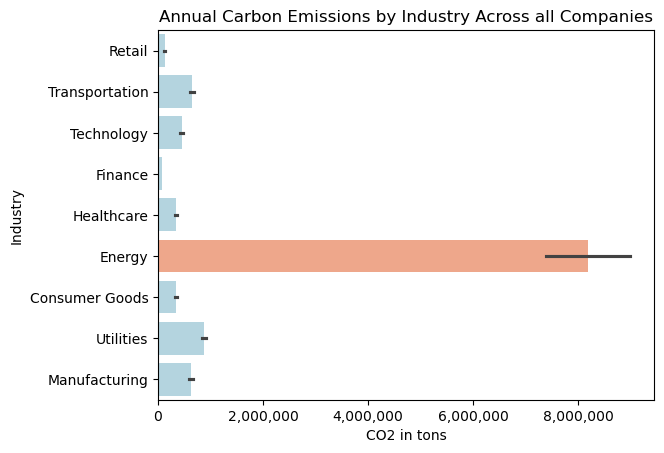

In [3]:
from matplotlib.ticker import FuncFormatter

# Set the label to highlight
highlight_label = 'Energy'

# Create a custom color palette
custom_palette = {
    label: 'lightsalmon' if label == highlight_label else 'lightblue'
    for label in df['Industry']
}

# Format x-axis to show plain numbers
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# create a bar plot visualizing the carbon emissions by industry
sns.barplot(x= df['CarbonEmissions'], y= df['Industry'], palette=custom_palette)
plt.title("Annual Carbon Emissions by Industry Across all Companies")
plt.xlabel("CO2 in tons")


### as shown in the bar plot, the highest Carbon Emissions are from the Energy Industry.

### 2. Visualize Carbon Emissons by Region 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16332\3279460571.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= df['CarbonEmissions'], y= df['Region'], palette=custom_palette)


Text(0.5, 0, 'CO2 in tons')

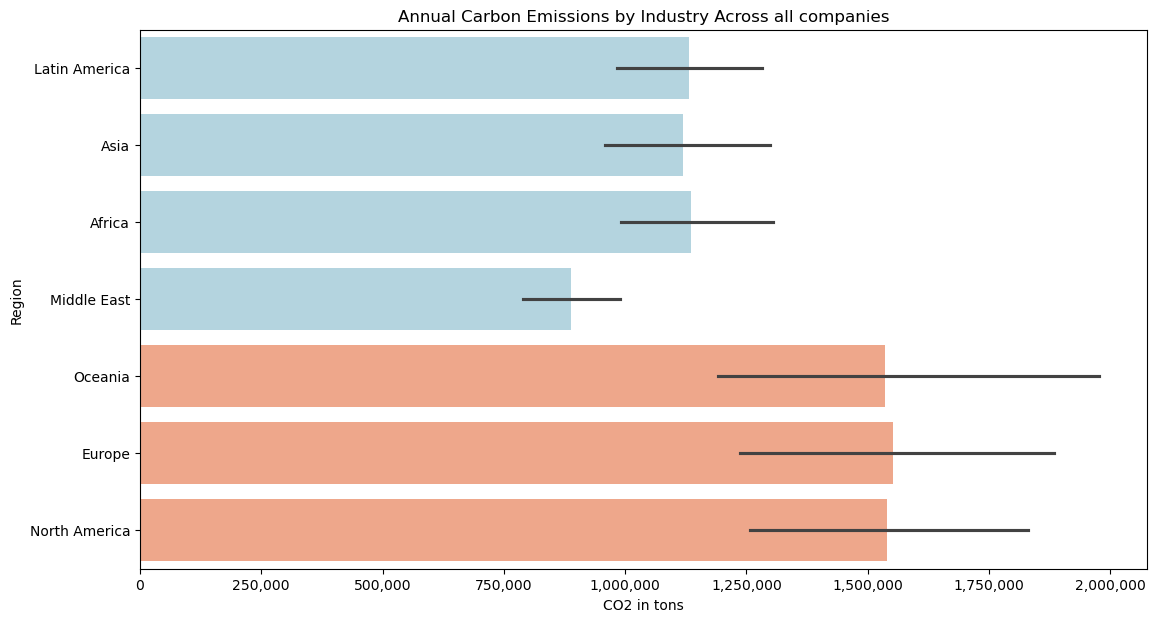

In [4]:
# Set the labels to highlight
highlight_labels = ['Oceania', 'Europe', 'North America']

# Create a custom color palette
custom_palette = {
    label: 'lightsalmon' if label in highlight_labels else 'lightblue'
    for label in df['Region'].unique()
}

# Format x-axis to show plain numbers
plt.figure(figsize=(13,7))
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# create a bar plot visualizing the carbon emissions by industry
sns.barplot(x= df['CarbonEmissions'], y= df['Region'], palette=custom_palette)
plt.title("Annual Carbon Emissions by Industry Across all companies")
plt.xlabel("CO2 in tons")

### as shown in the plot, Middle East has the least amount of Carbon Emissions being less than 1 million tons, where the highest amount of Carbon Emissions lie in Oceania, Europe, and North America Regions.

### 3. Trends in Average ESG Score by Region

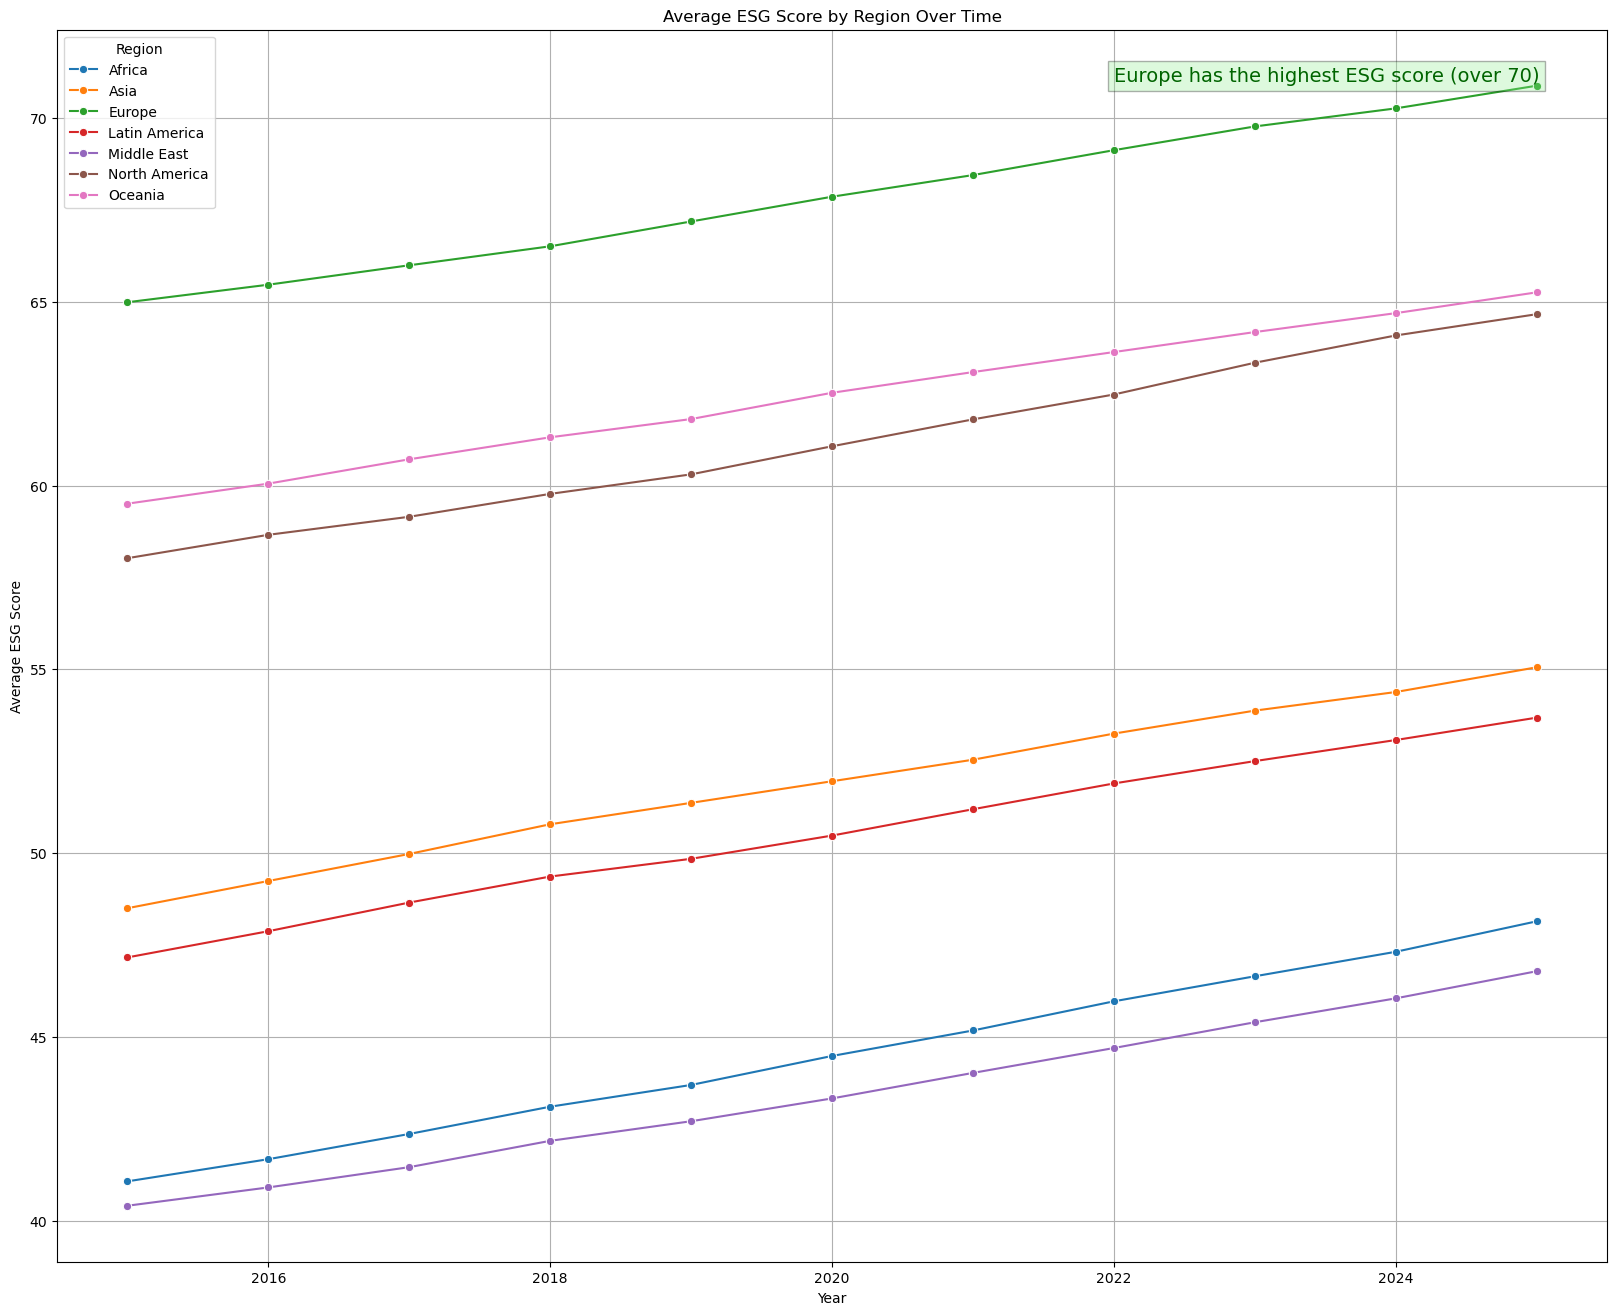

In [5]:
# Time Series: using line chart to visualize Sustainability "ESG Score" by Region

# group the data by region and year and get mean ESG score (1-100)
avg_energy = df.groupby(['Region', 'Year'])['ESG_Overall'].mean().reset_index()

# plot the line chart
plt.figure(figsize=(20,16))
sns.lineplot(data=avg_energy, x='Year', y='ESG_Overall', hue='Region', marker='o')
plt.title('Average ESG Score by Region Over Time')
plt.ylabel('Average ESG Score')
plt.xlabel('Year')
plt.grid(True)
plt.text(
    x=2022,             # X-axis position
    y=71,               # Y-axis position
    s='Europe has the highest ESG score (over 70)',  # Text
    fontsize=14,
    color='darkgreen',
    bbox=dict(facecolor='lightgreen', alpha=0.3)  # Optional background box
)

plt.show()

### looking at the overall Regions throughout the years, Energy Consumption has been increasing. However for the Regions Europe, North America, and Oceania it had Increased rapidly. Since Carbon Emissions are also the Highest for these Regions, Energy Consumption and Carbon Emissions may be correlated.

### 4. Scatter plot for ESG Environmental Score vs Emissions Intensity

Text(0, 0.5, 'Carbon Emissions Intensity tons/million USD')

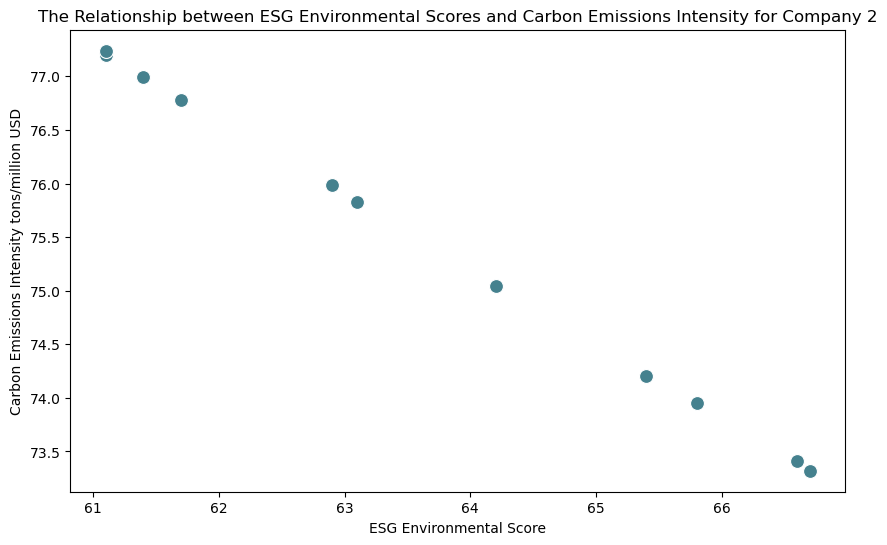

In [6]:
# Visualize the relationship between ESG Environmental Score with Emissions intensity to show how Emissions effect ESG Score

# filter out the data for company 2
company=df[df['CompanyName']=='Company_2']

# plot a scatter plot 
plt.figure(figsize=(10,6))
sns.scatterplot(x= company['ESG_Environmental'], y=company['EmissionIntensity'], s=100, color='#45818e')
plt.title("The Relationship between ESG Environmental Scores and Carbon Emissions Intensity for Company 2")
plt.xlabel("ESG Environmental Score")
plt.ylabel("Carbon Emissions Intensity tons/million USD")

### as shown in the Scatter plot, the Higher the amount of Carbon Emissions the Least the ESG Score would be for the Environmental Pillar, which makes sense since the Environmental part of the ESG strategy focuses on the company's impact on the planet.

### 5. Financial growth by Industries

Text(0, 0.5, 'Average Profit in millions')

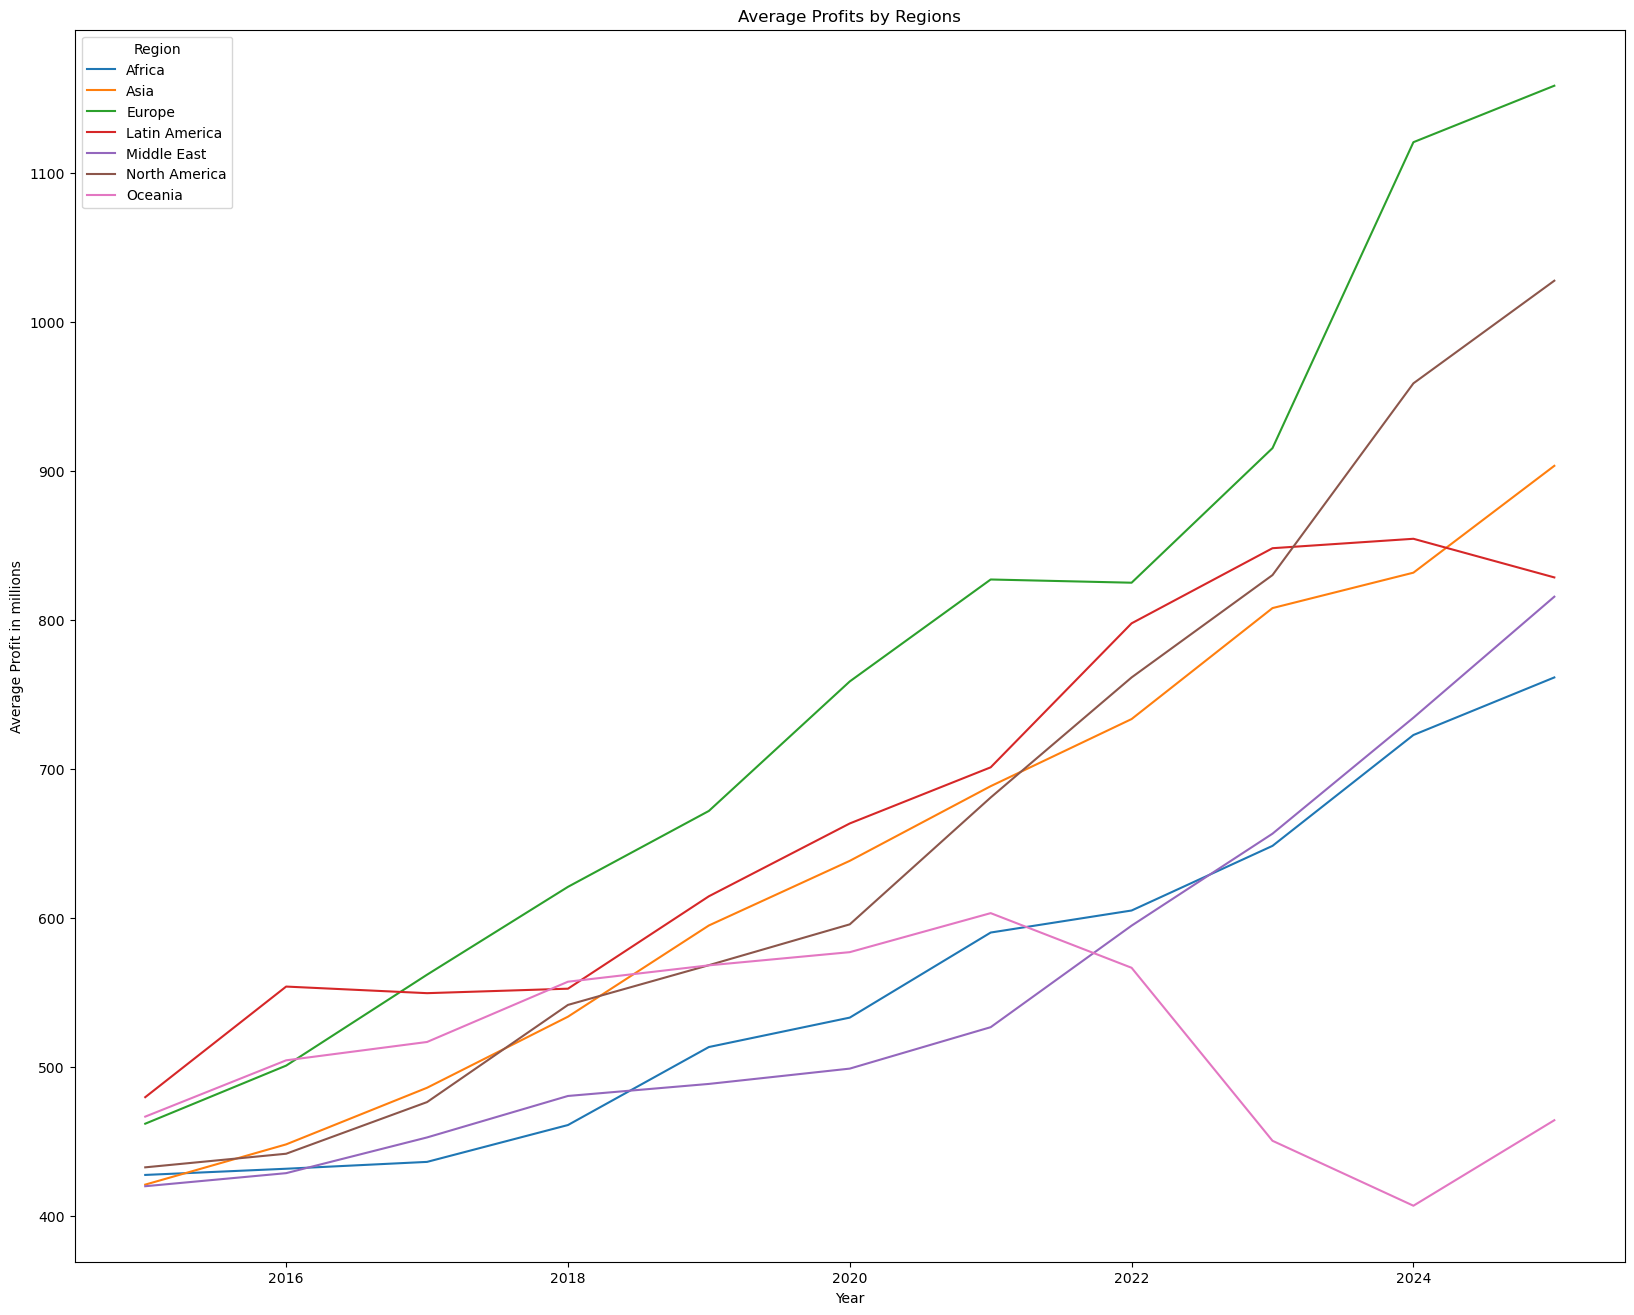

In [7]:
# visualizing the profits throughout the years by industries

# estimate the profit
df['Profit'] = (df['ProfitMargin'] / 100) * df['Revenue']  # Revenue is in millions

# group the data by Regions
regions = df.groupby(['Region', 'Year'])['Profit'].mean().reset_index(name='avg_profit')

# plot line chart
plt.figure(figsize=(20,16))
sns.lineplot(data=regions, x='Year', y='avg_profit', hue='Region')
plt.title("Average Profits by Regions")
plt.ylabel("Average Profit in millions")

### looking at the profits for each region by the years, at first Oceania had the highest Profit Margin at 2015 Then at 2025 it dropped significantly shown as the least region with profits. The plot shows increasing profits since 2015 for the all regions.

### 6. Energy Efficiency by Industries over time

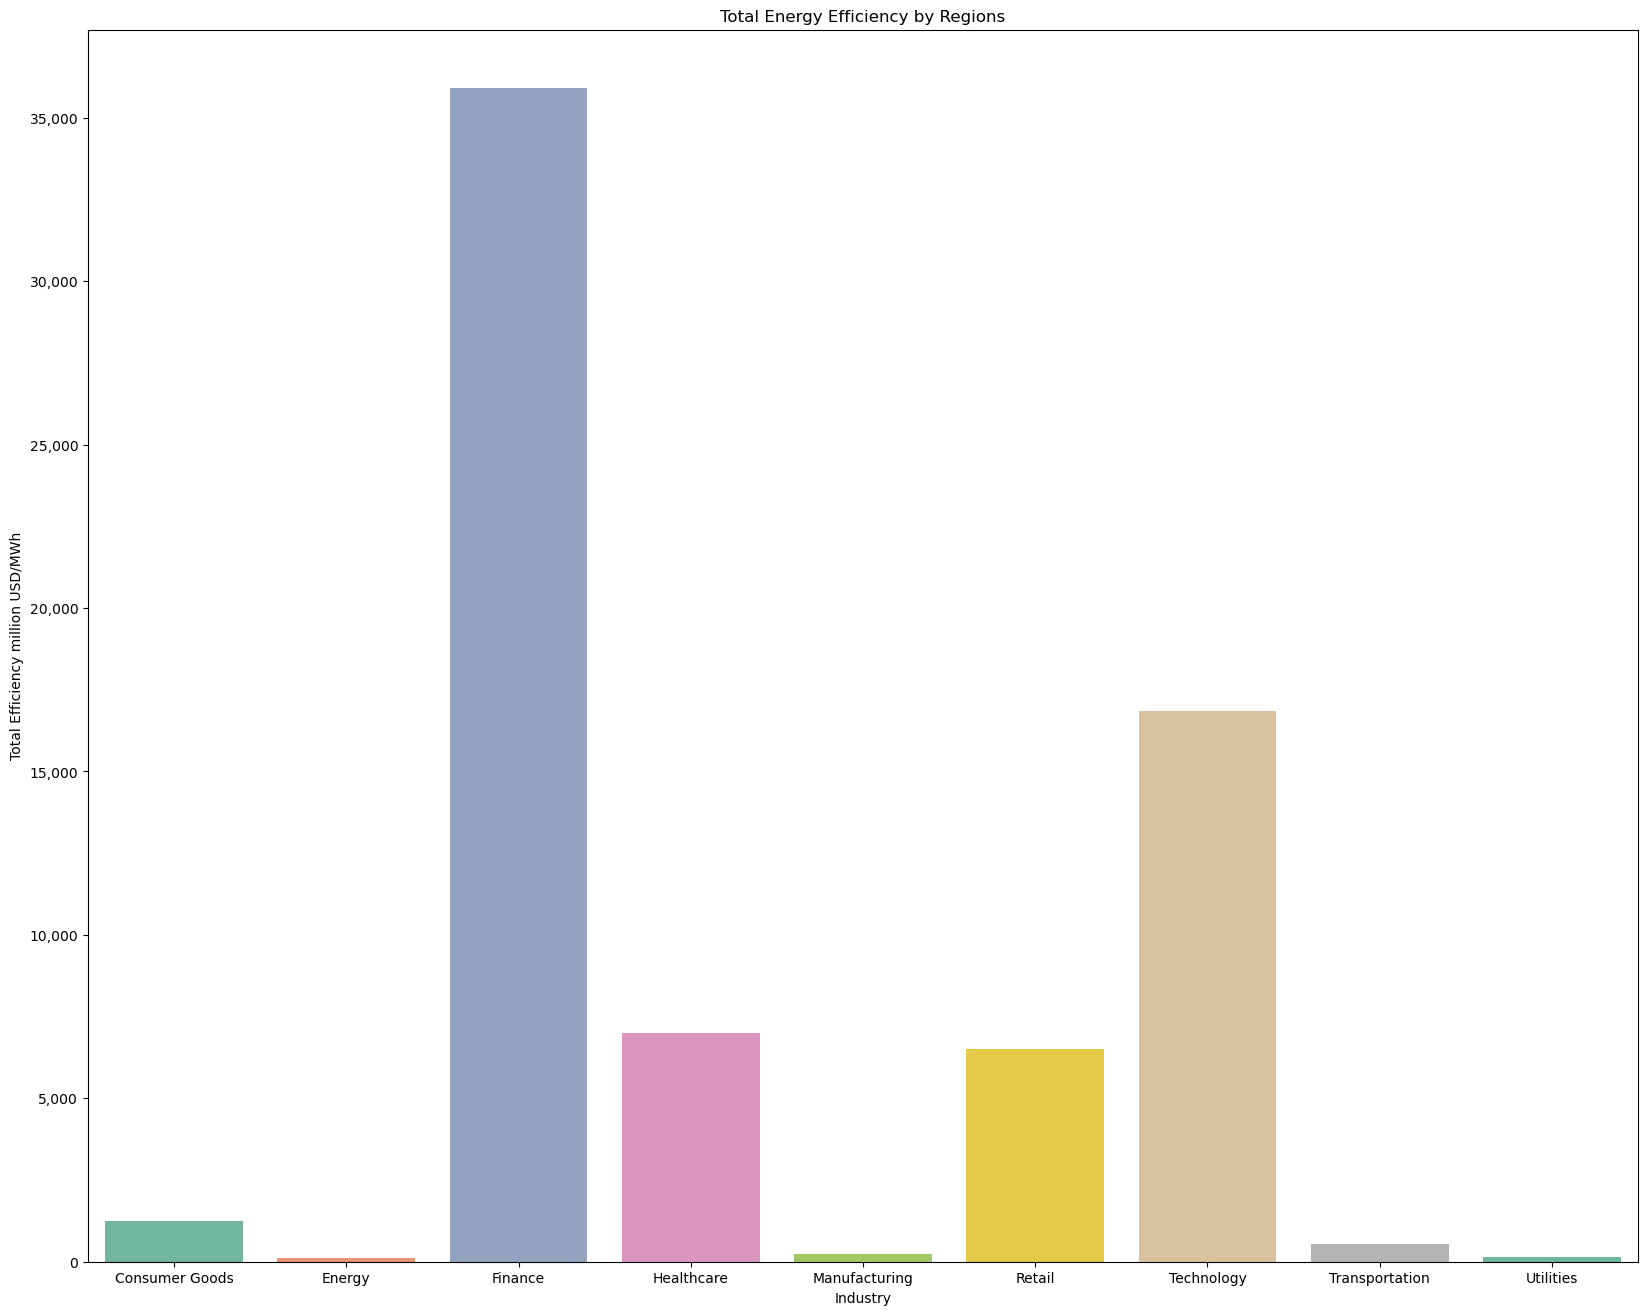

In [8]:
# visualizing the profits throughout the years by industries

# group the data by industries
industries = df.groupby(['Industry'])['EnergyEfficiency'].mean().reset_index(name='total_efficiency')

# Define formatter function
def million_formatter(x, pos):
    return f'{int(x * 1_000_000):,}'

# plot line chart
plt.figure(figsize=(20,16))
sns.barplot(data=industries, x='Industry', y='total_efficiency', hue='Industry', palette='Set2')
plt.title("Total Energy Efficiency by Regions")
plt.ylabel("Total Efficiency million USD/MWh")
# Apply formatter to x-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(million_formatter))

### as shown in the bar plot, the industry with the highest energy efficiency is the finance industry.

## Statistical Analysis

### 1. Descriptive Statistics

In [9]:
# Descriptive Statistics for all columns excluding company ID and year 
# List of columns to exclude
exclude_cols = ['CompanyID', 'Year']

# Call describe() on the remaining columns
df.drop(columns=exclude_cols).describe()

,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption,EmissionIntensity,EnergyEfficiency,WaterEfficiency,Profit
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,1.100000e+04,1.100000e+04,1.100000e+04,11000.000000,11000.000000,11000.000000,11000.000000
mean,4670.850591,10.900455,13380.622236,4.830370,54.615273,56.416991,55.660582,51.767655,1.271462e+06,5.600442e+05,1.165839e+07,315.110381,0.007455,0.032871,624.826743
std,9969.954369,8.758711,39922.870373,8.986141,15.893937,26.767233,23.356152,25.323370,5.067760e+06,1.565686e+06,5.095836e+07,319.881349,0.011447,0.055180,1683.811512
min,35.900000,-20.000000,1.800000,-36.000000,6.300000,0.000000,0.000000,0.000000,2.042200e+03,1.021100e+03,5.105500e+03,9.999244,0.000084,0.001706,-26024.290600
25%,938.775000,5.300000,1098.525000,-0.600000,44.100000,34.700000,37.600000,30.775000,1.228530e+05,6.488467e+04,3.069161e+05,62.883011,0.000203,0.003378,51.375875
50%,1902.300000,10.500000,3096.450000,4.830370,54.600000,55.600000,55.150000,52.100000,2.920734e+05,2.038805e+05,1.221745e+06,170.828618,0.001164,0.009848,166.722600
75%,4342.625000,16.300000,9995.500000,10.300000,65.600000,79.000000,73.800000,73.000000,7.407311e+05,5.251880e+05,5.616437e+06,595.215651,0.007951,0.026895,535.489200
max,180810.400000,50.000000,865271.700000,38.000000,98.800000,100.000000,100.000000,100.000000,1.741047e+08,5.223142e+07,1.741047e+09,1184.045931,0.040004,0.200015,31299.441000


### Checking the statistics for each column helps in concluding information about the performance of each company. for Example looking at the Profit Margin, the highest profit was 50 including all 1000 companies across the 10 year time frame.

### 2. Correlation Analysis

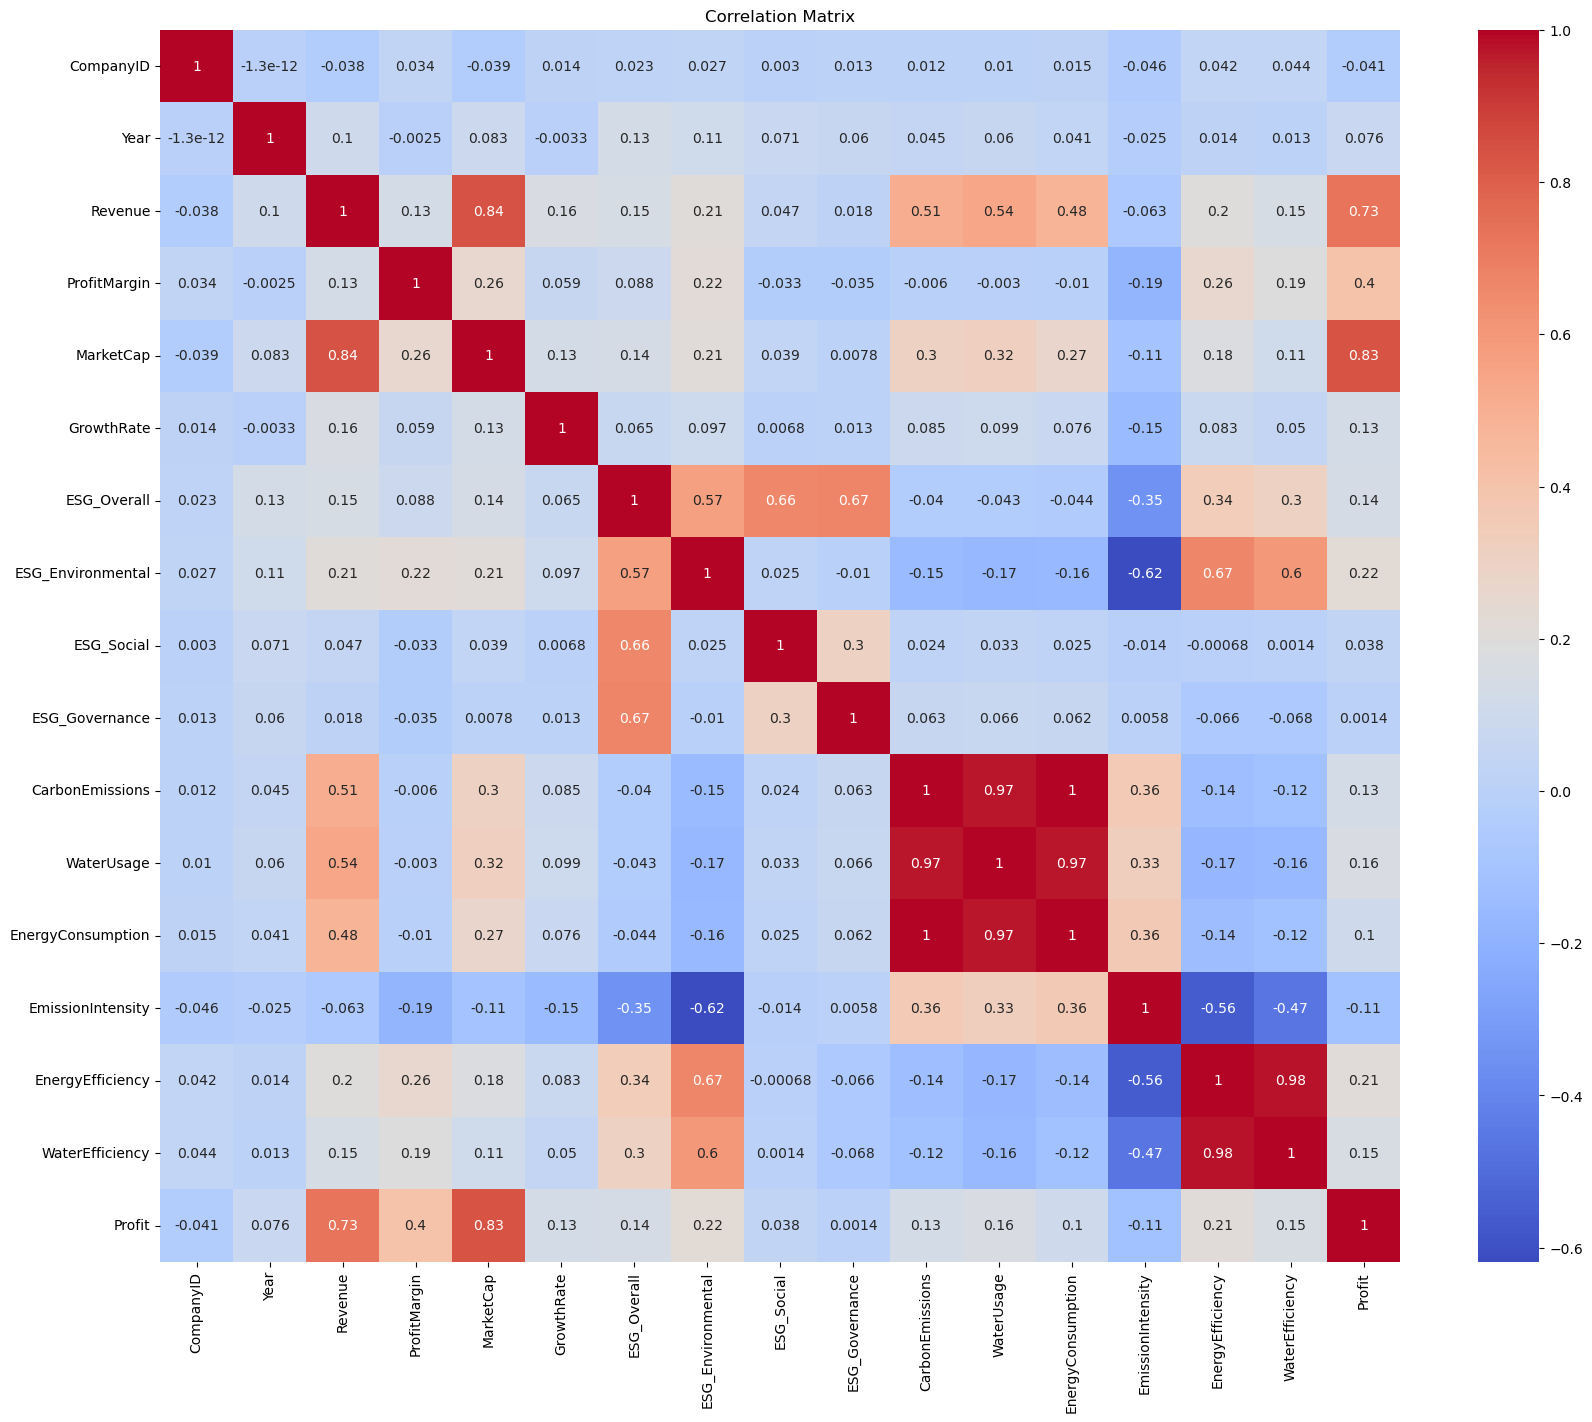

In [10]:
# Correlation matrix
correlation = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(20,16))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### looking at the Correlation Matrix, it shows that Carbon Emissions, Water Usage, and Energy Consumption are all highly correlated. Also, Energy Efficiency and Water Efficiency are Highly Correlated. These conclusions can help us later on to improve the ESG performance of the companies.

### 3. ANOVA: Compare means between the Regions Europe, North America, and Oceania

In [11]:
# import the anova test
from scipy.stats import f_oneway

# compare with the 3 regions
anova = f_oneway(
    df[df['Region'] == 'Europe']['Revenue'].dropna(),
    df[df['Region'] == 'North America']['Revenue'].dropna(),
    df[df['Region'] == 'Oceania']['Revenue'].dropna()
)

# print out the result
print(f"F-statistic: {anova.statistic:.3f}, P-value: {anova.pvalue:.3f}")


F-statistic: 5.955, P-value: 0.003


### Conduncting the ANOVA test for the Regions with the Highest amount of Carbon Emissions after looking at the plot it looks like there aren't any significant difference But Since the P-value is smaller then the significance level 0.05 then we conclude that there is a significant mean difference between the regions.

## Key Insights

### - higher ESG Environmental scores align with lower Carbon emissions, which concludes that the company that has higher ESG Environmental Scores reduces thier CO2 Emissions and contributes to climate change mitigation.

### - The Finance Industry has the highest Energy Efficiency which further elaborates that the finance industry is generating more revenue per unit of energy consumed and that implies better operational efficiency and lower energy cost per dollar earned.

### - Despite experiencing financial decline over time, the Oceania region maintained a higher overall ESG score, indicating strong leadership in sustainability. While ESG strategies provide valuable frameworks for enhancing sustainability performance, focusing solely on ESG metrics without considering profitability may lead to unintended consequences.